# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kish
Processing Record 2 of Set 1 | balykshi
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | semarang
Processing Record 10 of Set 1 | luorong
Processing Record 11 of Set 1 | malabar
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | faribault
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | tbeng meanchey
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | valley east
City not f

Processing Record 36 of Set 4 | fortuna
Processing Record 37 of Set 4 | abu dhabi
Processing Record 38 of Set 4 | rio grande
Processing Record 39 of Set 4 | sirte
Processing Record 40 of Set 4 | micheweni
Processing Record 41 of Set 4 | pedernales
Processing Record 42 of Set 4 | askino
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | mahenge
Processing Record 46 of Set 4 | valle de la pascua
Processing Record 47 of Set 4 | colonel hill
Processing Record 48 of Set 4 | isafjordur
Processing Record 49 of Set 4 | labuan
Processing Record 0 of Set 5 | izluchinsk
Processing Record 1 of Set 5 | hinche
Processing Record 2 of Set 5 | makhambet
Processing Record 3 of Set 5 | neiafu
Processing Record 4 of Set 5 | kapuskasing
Processing Record 5 of Set 5 | cruzeiro do sul
Processing Record 6 of Set 5 | fort mcmurray
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | souillac
Processing Record 9 of Set 5 

Processing Record 28 of Set 8 | ilebo
Processing Record 29 of Set 8 | andergrove
Processing Record 30 of Set 8 | san jeronimito
Processing Record 31 of Set 8 | kodinsk
Processing Record 32 of Set 8 | bluefields
Processing Record 33 of Set 8 | juan griego
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | tindouf
Processing Record 36 of Set 8 | soroti
Processing Record 37 of Set 8 | kilindoni
Processing Record 38 of Set 8 | tazovsky
Processing Record 39 of Set 8 | dingcheng
Processing Record 40 of Set 8 | ambazac
Processing Record 41 of Set 8 | dul'durga
Processing Record 42 of Set 8 | tulun
Processing Record 43 of Set 8 | priargunsk
Processing Record 44 of Set 8 | ariquemes
Processing Record 45 of Set 8 | burela de cabo
Processing Record 46 of Set 8 | buzuluk
Processing Record 47 of Set 8 | mata-utu
Processing Record 48 of Set 8 | prince george
Processing Record 49 of Set 8 | yuzhno-kurilsk
Processing Record 0 of Set 9 | chernyshevsk
Processing Record 1 of Set 9 

Processing Record 17 of Set 12 | kangding
Processing Record 18 of Set 12 | cobija
Processing Record 19 of Set 12 | gobabis
Processing Record 20 of Set 12 | misratah
Processing Record 21 of Set 12 | enniskillen
Processing Record 22 of Set 12 | 'ibri
City not found. Skipping...
Processing Record 23 of Set 12 | cole harbour
Processing Record 24 of Set 12 | tarnogskiy gorodok
Processing Record 25 of Set 12 | tongouson
Processing Record 26 of Set 12 | motygino
Processing Record 27 of Set 12 | borazjan
Processing Record 28 of Set 12 | ust'-barguzin
Processing Record 29 of Set 12 | dali
Processing Record 30 of Set 12 | indianola
Processing Record 31 of Set 12 | novyy urgal
Processing Record 32 of Set 12 | gueltat zemmour
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kish,26.5578,54.0194,23.15,60,0,0.00,IR,1701649096
1,balykshi,47.0667,51.8667,7.00,100,100,5.00,KZ,1701649096
2,bilibino,68.0546,166.4372,-21.98,99,100,1.17,RU,1701649097
3,olonkinbyen,70.9221,-8.7187,0.56,92,29,6.18,SJ,1701649098
4,bethel,41.3712,-73.4140,7.90,89,100,3.60,US,1701649074


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_complete.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_complete.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kish,26.5578,54.0194,23.15,60,0,0.00,IR,1701649096
1,balykshi,47.0667,51.8667,7.00,100,100,5.00,KZ,1701649096
2,bilibino,68.0546,166.4372,-21.98,99,100,1.17,RU,1701649097
3,olonkinbyen,70.9221,-8.7187,0.56,92,29,6.18,SJ,1701649098
4,bethel,41.3712,-73.4140,7.90,89,100,3.60,US,1701649074


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

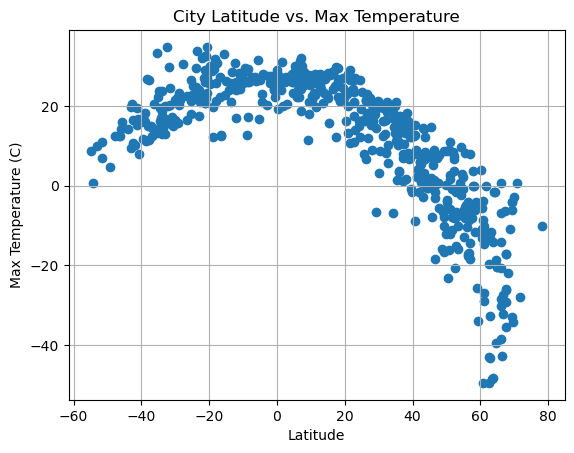

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Max Temp'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

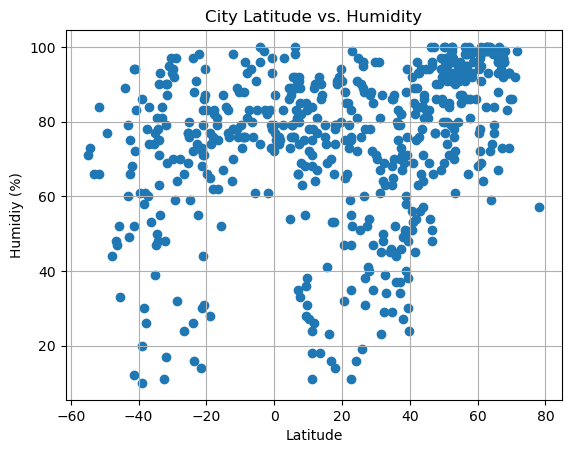

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Humidity'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidiy (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

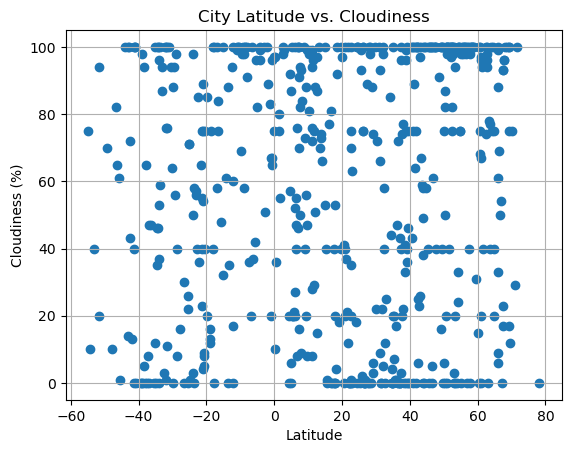

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Cloudiness'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

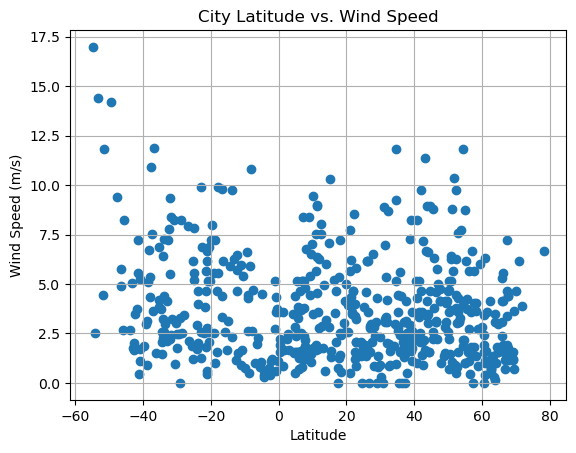

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Wind Speed'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots

def lin_regress_plot (x_values, y_values, y_axis):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)
    
    # Set x coordinates for model's formula 
    if x_values.sum() > 0:
        x_coord = 5
    else:
        x_coord = -50
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord,10),fontsize=18,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    
    # Print r square value
    print(f"The r-value is: {rvalue}")

    # Show plot
    return plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kish,26.5578,54.0194,23.15,60,0,0.00,IR,1701649096
1,balykshi,47.0667,51.8667,7.00,100,100,5.00,KZ,1701649096
2,bilibino,68.0546,166.4372,-21.98,99,100,1.17,RU,1701649097
3,olonkinbyen,70.9221,-8.7187,0.56,92,29,6.18,SJ,1701649098
4,bethel,41.3712,-73.4140,7.90,89,100,3.60,US,1701649074


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,4.68,77,70,14.21,TF,1701649100
7,ushuaia,-54.8000,-68.3000,8.81,71,75,16.98,AR,1701649100
8,semarang,-6.9932,110.4203,26.96,94,20,1.03,ID,1701648971
10,malabar,-33.9667,151.2500,23.73,63,37,3.22,AU,1701649102
11,margaret river,-33.9500,115.0667,18.67,71,96,4.37,AU,1701649103


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8646279837439189


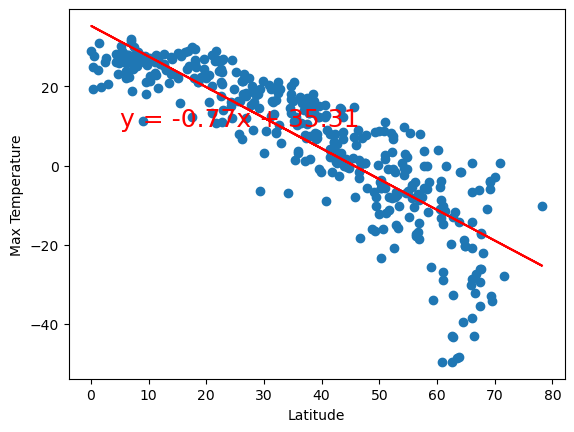

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
y_axis = 'Max Temperature'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.637440348646348


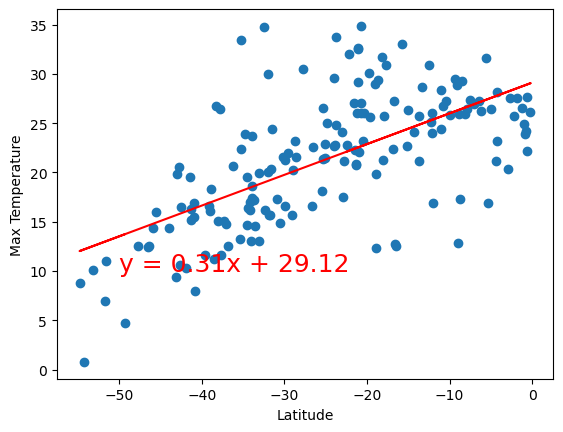

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
y_axis = 'Max Temperature'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34542063207488105


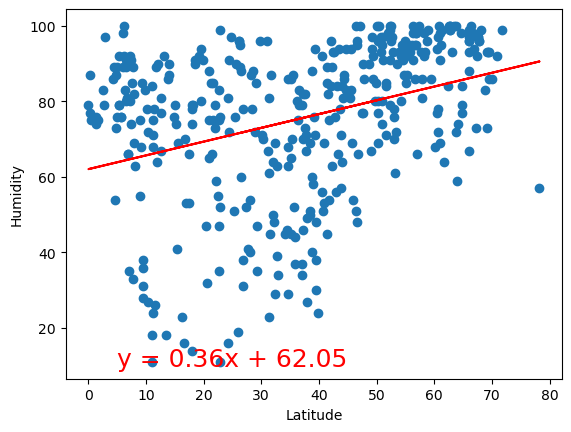

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
y_axis = 'Humidity'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.3174748340079797


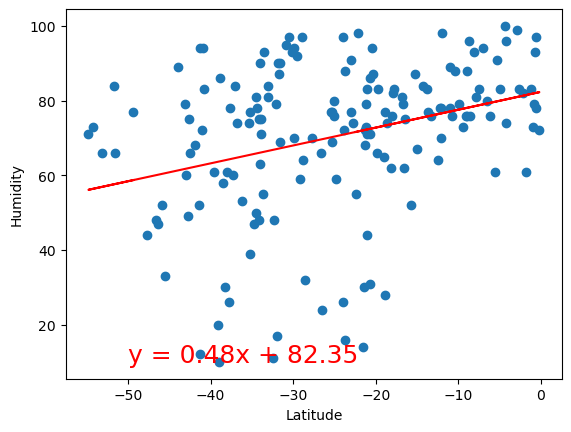

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
y_axis = 'Humidity'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13598611524682286


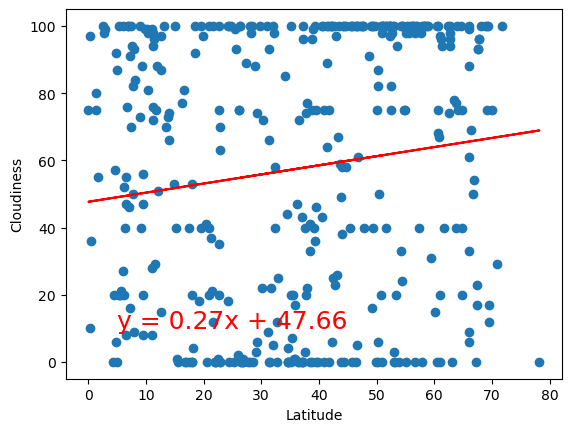

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
y_axis = 'Cloudiness'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.24471821548869996


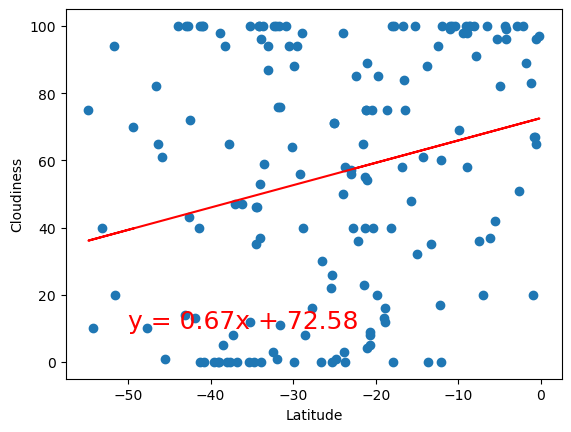

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
y_axis = 'Cloudiness'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04676101270477753


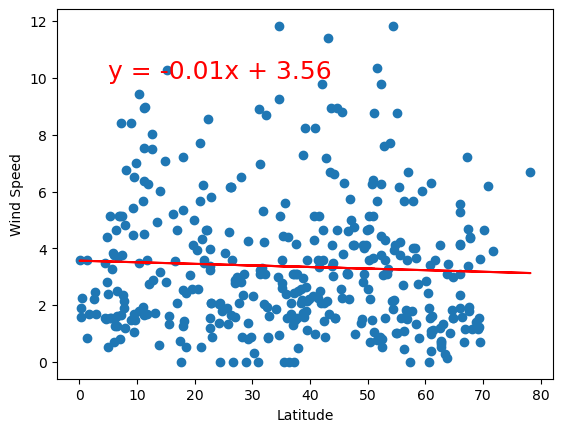

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
y_axis = 'Wind Speed'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: -0.2986285611635526


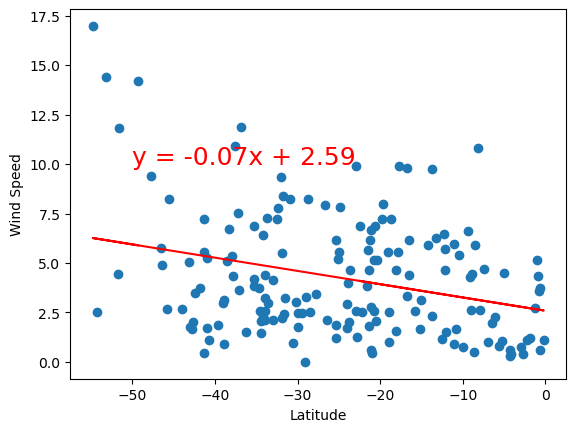

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
y_axis = 'Wind Speed'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** YOUR RESPONSE HERE